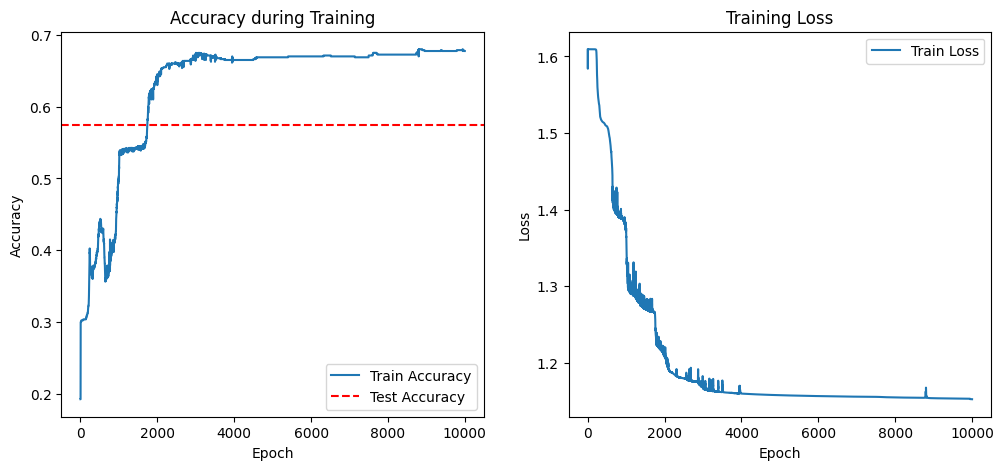

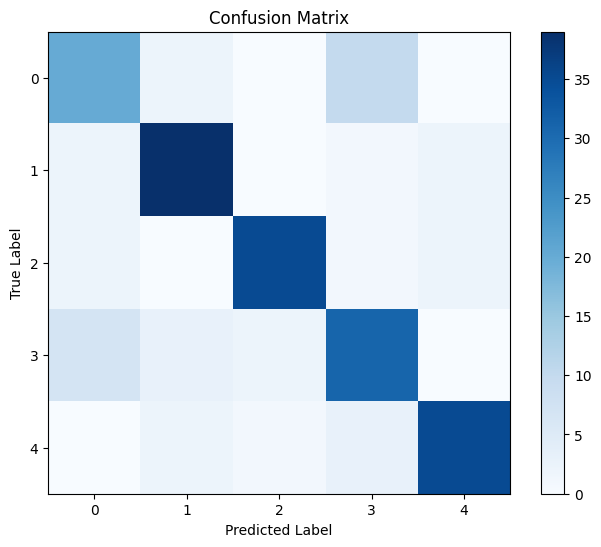

Highest Accuracy: 0.68
Lowest Error Rate (Loss): 1.152577519416809
F1 Values for Each Class:
Class 1: 0.634920634920635
Class 2: 0.8666666666666666
Class 3: 0.8974358974358975
Class 4: 0.6966292134831461
Class 5: 0.875


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=5, n_clusters_per_class=1, n_informative=5, random_state=42)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert numpy arrays to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

# One-hot encode the ground truth labels for training
y_train_onehot = nn.functional.one_hot(y_train)

# Define NeuralNetwork class
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.inputLayerNeurons = 20
        self.hiddenLayerNeurons = 10
        self.outLayerNeurons = 5
        self.learning_rate = 0.2
        self.W_HI = nn.Parameter(torch.randn(self.inputLayerNeurons, self.hiddenLayerNeurons))
        self.W_OH = nn.Parameter(torch.randn(self.hiddenLayerNeurons, self.outLayerNeurons))

    def sigmoid(self, x, der=False):
        if der:
            return x * (1-x)
        else:
            return 1 / (1 + torch.exp(-x))

    def feedForward(self, X):
        self.hidden_input = torch.matmul(X, self.W_HI)
        self.hidden_output = self.sigmoid(self.hidden_input)
        self.output_input = torch.matmul(self.hidden_output, self.W_OH)
        self.pred = self.sigmoid(self.output_input)
        return self.pred

    def backPropagation(self, X, Y, pred):
        self.output_error = Y - pred
        self.output_delta = self.learning_rate * self.output_error * self.sigmoid(pred, der=True)
        self.hidden_error = torch.matmul(self.output_delta, self.W_OH.T)
        self.hidden_delta = self.learning_rate * self.hidden_error * self.sigmoid(self.hidden_output, der=True)
        self.W_HI.data += torch.matmul(X.T, self.hidden_delta)
        self.W_OH.data += torch.matmul(self.hidden_output.T, self.output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

    def evaluate_accuracy(self, X, Y):
        with torch.no_grad():
            output = self.feedForward(X)
            predicted = torch.argmax(output, dim=1)
            accuracy = accuracy_score(Y, predicted)
        return accuracy

# Initialize the neural network
nn = NeuralNetwork()

# Train the neural network
train_accuracy = []
train_losses = []
for _ in range(10000):
    nn.train(X_train, y_train_onehot)
    accuracy = nn.evaluate_accuracy(X_train, y_train)
    train_accuracy.append(accuracy)
    # Calculate and store the loss during training
    with torch.no_grad():
        output = nn.feedForward(X_train)
        loss = torch.nn.CrossEntropyLoss()(output, y_train)
        train_losses.append(loss.item())

# Evaluate the trained model on the test set
test_accuracy = nn.evaluate_accuracy(X_test, y_test)

# Plot the accuracy during training
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy')
plt.axhline(test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Accuracy during Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot the error (loss) during training
plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Train Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Confusion matrix
model.eval()
with torch.no_grad():
    output = model(X_test)
    predicted = torch.argmax(output, 1)

cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(5), np.arange(5))
plt.yticks(np.arange(5), np.arange(5))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the highest accuracy value achieved during training
highest_accuracy = max(train_accuracy)
print("Highest Accuracy:", highest_accuracy)

# Print the lowest error rate (loss) achieved during training
lowest_error_rate = min(train_losses)
print("Lowest Error Rate (Loss):", lowest_error_rate)

# Calculate F1-score from the confusion matrix
true_positives = np.diag(cm)
false_positives = np.sum(cm, axis=0) - true_positives
false_negatives = np.sum(cm, axis=1) - true_positives

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1 = 2 * (precision * recall) / (precision + recall)

# Print the F1 value for each class
print("F1 Values for Each Class:")
for i in range(len(f1)):
    print(f"Class {i + 1}: {f1[i]}")
